In [1]:
#!/usr/bin/env python3 

In [70]:
# Author: Mbonu Chinedum Endurance 
# Team: TEAM-358-GROUP-A 
# Description: FASGD-III (Sound Wave Analysis) 
# Program: ANDELA BUILD FOR SDG COHORT-2 2020 
# Country: Nigeria 
# Date Created: 5-sep-2020 
# Date Modified: 

In [49]:
# importing the necessary packages 
import os 
import re
import string
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pickle 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical 

In [50]:
# Creating the data and labels lists 
data = list() 
labels = list() 


# listing the items in the dataset 
dirs = os.listdir("dataset/")

# Using a for-loop to extract data sentences from each respective labels 
for label in dirs:
    # Getting the full path to the label dataset and split at the end of a line. 
    full_path = os.path.sep.join(["dataset", label])
    features = open(full_path, "r").read().split("\n")

    # For each sentence in the loaded labels dataset, append the value into the data list 
    # And its labels. 
    for sentences in features:
        data.append(sentences) 
        labels.append(label)




In [51]:
# Converting the data, and labels list into an array 
data = np.array(data) 
labels = np.array(labels) 

# Converting both the labels, and data numpy arrray into a pandas Dataframe 
df1 = pd.DataFrame(labels) 
df2 = pd.DataFrame(data)

# Converting both pandasData frame into a single data frame using the concat 
# Method inside the pandas class 
df = pd.concat([df1, df2], axis=1)

In [52]:
df.columns = ["label", "message"]
df.head() 

,label,message
0,greetings,"Sunrises are beautiful just like you, and i wi..."
1,greetings,"Good morning to a wonderful soul, wish you spr..."
2,greetings,"May your day be filled with laughter, morning."
3,greetings,A very good morning to you may this day bring ...
4,greetings,"Good morning darling, hope when you open your ..."


In [53]:
df["label"].unique() 

array(['greetings', 'unknown', 'age', 'task', 'password', 'goodbye',
       'name'], dtype=object)

In [54]:
df["label"].value_counts() 

unknown      1001
name         1001
age          1001
greetings    1001
goodbye      1001
task         1001
password     1001
Name: label, dtype: int64

In [55]:
df.count() 

label      7007
message    7007
dtype: int64

In [56]:
t_age = df[df["label"] == "age"] 

In [57]:
t_age

,label,message
2002,age,How old are you?
2003,age,Do you mind if I ask how old you are?
2004,age,What is your age?
2005,age,i want to know your age please
2006,age,tell your age please
...,...,...
2998,age,what is the age
2999,age,age ??
3000,age,age ??
3001,age,"tell them the age plese, becaue we eante to tk..."


In [58]:
new_string = string.punctuation.replace(",", "")

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
new_string

'!"#$%&\'()*+-./:;<=>?@[\\]^_`{|}~'

In [61]:
# displaying the count of the values in the lable column 
df.count() 

label      7007
message    7007
dtype: int64

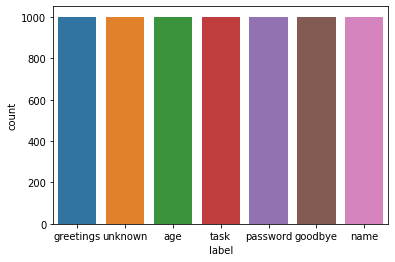

In [62]:
# showing a countplot of the target column 
sns.countplot(x="label", data=df)
plt.show() 

In [63]:
# Creating a regex method for removing all the html tags
TAG_RE = re.compile(r'<[^>]+>')
new_string = string.punctuation.replace(",", "")

# Creating a function for using the regex html remover method. 
def remove_tags(message):
    return TAG_RE.sub('', message)

# Creating a function to clean the input tweets 
def clean_text(message):
    # Converting into small letters 
    message = message.lower() 
    # Removing html tags 
    message = remove_tags(message)
    # removing the single character 
    message = re.sub(r"\s+[a-zA-Z]\s+", ' ', message)
    # removing the multiple spaces 
    message = re.sub(r'\s+', ' ', message)
    # removing the punctuation 
    message = ''.join([t for t in message if t not in new_string])
    #
    return message 

# Applying the function to the text column to perform some 
# Basic filtering nlkt methods. 
df['message'] = df['message'].apply(clean_text)
# showing the head of the dataset after the filtering process 
df.head()

,label,message
0,greetings,"sunrises are beautiful just like you, and wish..."
1,greetings,"good morning to wonderful soul, wish you sprea..."
2,greetings,"may your day be filled with laughter, morning"
3,greetings,a very good morning to you may this day bring ...
4,greetings,"good morning darling, hope when you open your ..."


In [64]:
# Creating an instance of the countvectorizer class 
vectorizer = TfidfVectorizer()  

# converting the text column into numpy array 
X = df['message'].values

# Convert the message to vectors 
X = vectorizer.fit_transform(X).toarray() 

# converting the target labels into numpy array 
# creating a dictionary to map the question and conversation label to numerical values 
label_encoder = LabelEncoder() 


# mapping the label key values to the label column 
y = label_encoder.fit_transform(df["label"]).astype("float32")
y = to_categorical(y)

# Getting the input and output dim 
INPUT_DIM = X.shape[1]
OUTPUT_DIM = y.shape[1]

In [65]:
y.shape

(7007, 7)

In [66]:
X.shape

(7007, 1784)

In [67]:
INPUT_DIM 

1784

In [68]:
OUTPUT_DIM

7

In [69]:
# calling in the train test split to split the dataset into training and testing split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.33, 
                                                   random_state=20)

In [70]:
# showing the shape of the dataset  
print('Shape of Input Data: {}'.format(X_train.shape))  # row X columns 
print('Shape of Input Data: {}'.format(X_test.shape))

print('Shape of Output Data: {}'.format(y_train.shape))
print('Shape of Output Data: {}'.format(y_test.shape))

Shape of Input Data: (4694, 1784)
Shape of Input Data: (2313, 1784)
Shape of Output Data: (4694, 7)
Shape of Output Data: (2313, 7)


In [71]:
# Building the model 
model = Sequential() 
model.add(Dense(250, input_dim=INPUT_DIM, activation='relu'))
model.add(Dense(120, kernel_initializer='he_uniform', bias_initializer='zeros', activation='relu' ))
model.add(Dense(8, kernel_initializer='he_uniform', bias_initializer='zeros', activation='relu' ))
model.add(Dense(OUTPUT_DIM, activation='sigmoid'))

# Compiling the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Showing the summary of the compiled model 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               446250    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30120     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 968       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 63        
Total params: 477,401
Trainable params: 477,401
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/20
939/939 [==============================] - 18s 19ms/step - loss: 0.0012 - accuracy: 0.9991 - val_loss: 0.0019 - val_accuracy: 0.9991
Epoch 2/20
939/939 [==============================] - 20s 21ms/step - loss: 9.5049e-04 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9991
Epoch 3/20
939/939 [==============================] - 14s 15ms/step - loss: 9.8781e-04 - accuracy: 0.9991 - val_loss: 0.0012 - val_accuracy: 0.9991
Epoch 4/20
939/939 [==============================] - 13s 14ms/step - loss: 7.2575e-04 - accuracy: 0.9991 - val_loss: 0.0011 - val_accuracy: 0.9991
Epoch 5/20
939/939 [==============================] - 14s 14ms/step - loss: 7.1407e-04 - accuracy: 0.9989 - val_loss: 8.9793e-04 - val_accuracy: 0.9991
Epoch 6/20
939/939 [==============================] - 15s 16ms/step - loss: 6.5072e-04 - accuracy: 0.9989 - val_loss: 6.9694e-04 - val_accuracy: 0.9991
Epoch 7/20
939/939 [==============================] - 13s 14ms/step - loss: 5.6658e-04 - accuracy: 0.9989 - 

In [74]:
# saving the trained model weight file and the model for 
# the vectorizer 
model.save_weights('model/fasgd-model.h5')

# specifying the name of the model file 
filename = "encoders/encoders.pkl"

# # saving the model to disk 
pickle.dump((vectorizer, label_encoder), open(filename, 'wb'))

In [85]:
# note that from 0 to 0.5 ==> conversation
# note that from 0.5 to 1 or 0.99  ===> question
# Making predictions on new unseen dataset for svm model 
examples = "i am angry now tho, but how old 3333 are you ?"
examples = [clean_text(examples)] 
print(examples)

examples = vectorizer.transform(examples).toarray()

predicted = model.predict(examples)
predicted

['i am angry now tho, but how old 3333 are you ']


array([[9.9998218e-01, 4.2300715e-11, 4.1150665e-20, 6.5247043e-14,
        2.6768418e-31, 1.7039990e-06, 0.0000000e+00]], dtype=float32)

In [86]:
pred1 = label_encoder.classes_[np.argmax(predicted)]

print(pred1) 

age


In [88]:
predicted

array([[9.9998218e-01, 4.2300715e-11, 4.1150665e-20, 6.5247043e-14,
        2.6768418e-31, 1.7039990e-06, 0.0000000e+00]], dtype=float32)

In [89]:
label_encoder.classes_

array(['age', 'goodbye', 'greetings', 'name', 'password', 'task',
       'unknown'], dtype=object)

## Working With The Question Class

The question class will contain the follow labels that its model or classifier would be trained on. 

i) age 

ii) name 

iii) task 

iv) wikipedia question 

v) life expanctancy 

vi) analysis problem 

vii) location 

viii) bio_question 

In [66]:
# importing the necessary packages 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk import pos_tag, ne_chunk 

# setting some basic parameters for the graph plotting 
sns.set_palette('husl') 
%matplotlib inline 

In [67]:
# specifying the path to the question dataset 
dataset = 'Datasets/question_dataset.csv'

# reading the dataset into memory 
df = pd.read_csv(dataset)

In [68]:
# displaying the head of the dataset  
df.head() 

,date,main_tag,tag,message
0,2020-02-09 14:20:21.741485,question,name,please what is your name ?
1,2020-02-09 14:20:36.041103,question,age,okay thanks so how old are you today ?
2,NaN,question,task,what are you really good at ?
3,NaN,question,task,what are you good at really
4,NaN,question,task,tell me what you can do


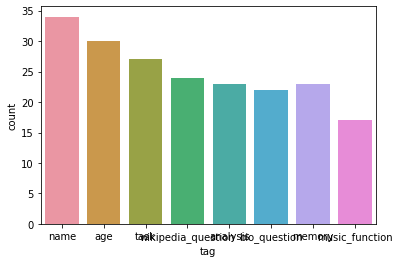

In [69]:
# Cleaning the text
import string 
from nltk.corpus import stopwords 
from nltk import PorterStemmer as Stemmer
def process(text):
    # turn the texts into lowercase
    text = text.lower() 
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords 
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # Stemming the words 
    stemmer = Stemmer() 
    text = [stemmer.stem(t) for t in text]
    # Return the token list 
    return text 

# showing the plot of the label column
sns.countplot(data=df, x='tag')
plt.show() 

In [70]:
# Building a model 
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Specifying the vectorizer to use 
vectorizer = CountVectorizer()

# Changing the message column into a vector of numbers 
X = vectorizer.fit_transform(df['message'].values)

# changing the targets into a simple output 
y = df['tag'].values 

# Balancing the dataset by oversampling it 
oversample = SMOTE(random_state = 42) 
# fitting and applying the transform 
X_balanced, y_balanced = oversample.fit_sample(X, y)

# performing a training and a spliting test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,
                                                    test_size=0.20,
                                                    random_state = 21)

In [71]:
# Building the model and training it 
model = LogisticRegression(solver='lbfgs')

# Training the model 
model.fit(X_train, y_train)

# Checking the accuracy of the model befor deployment 
model.score(X_test, y_test)

/home/mbonu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

In [72]:
list(df['tag'].unique())

['name',
 'age',
 'task',
 'wikipedia_question',
 'analysis',
 'bio_question',
 'memory',
 'music_function']

In [73]:
# Making predictions on new unseen dataset 
examples = ['hello, how old are you', 'and what is your name', 'analysis please',
            'how are you doing', 'please what what our last discussion yesterday?']
examples_counts = vectorizer.transform(examples)


predictions = model.predict(examples_counts)
predictions 

array(['age', 'name', 'analysis', 'bio_question', 'memory'], dtype=object)

In [74]:
import joblib 

# save the model to disk
filename = 'question/question_model.pb'
joblib.dump((model, vectorizer), filename)
 
# some time later...
 
# load the model from disk
loaded_model, vectorizer = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

1.0


## Working with the Conversation Class 

The conversation class will contain the label that the model will be trained on 

i) good response 

ii) greetings 

iii) hate/insults 

iv) interaction 

v) goodbye 

vi) bad_mood 

vii) 

In [75]:
# importing the necessary packages 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk import pos_tag, ne_chunk 

# setting some basic parameters for the graph plotting 
sns.set_palette('husl') 
%matplotlib inline 

In [76]:
# specifying the path to the question dataset 
dataset = 'Datasets/conversation_dataset.csv'

# reading the dataset into memory 
df = pd.read_csv(dataset)

In [77]:
# displaying the head of the dataset  
df.head() 

,date,main_tag,tag,message
0,2020-02-09 14:20:12.121820,conversation,greetings,hello
1,2020-02-09 14:23:00.213853,conversation,greetings,hello
2,NaN,conversation,good_reply,thanks for everything
3,NaN,conversation,good_reply,i am fine thanks
4,NaN,conversation,good_reply,fine


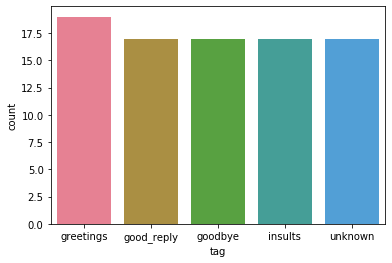

In [78]:
# Cleaning the text
import string 
from nltk.corpus import stopwords 
from nltk import PorterStemmer as Stemmer
def process(text):
    # turn the texts into lowercase
    text = text.lower() 
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords 
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # Stemming the words 
    stemmer = Stemmer() 
    text = [stemmer.stem(t) for t in text]
    # Return the token list 
    return text 

# showing the plot of the label column
sns.countplot(data=df, x='tag')
plt.show() 

In [79]:
# viewing the dataset 
df.head() 

,date,main_tag,tag,message
0,2020-02-09 14:20:12.121820,conversation,greetings,hello
1,2020-02-09 14:23:00.213853,conversation,greetings,hello
2,NaN,conversation,good_reply,thanks for everything
3,NaN,conversation,good_reply,i am fine thanks
4,NaN,conversation,good_reply,fine


In [80]:
# Building a model 
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Specifying the vectorizer to use 
vectorizer = CountVectorizer()

# Changing the message column into a vector of numbers 
X = vectorizer.fit_transform(df['message'].values)

# changing the targets into a simple output 
y = df['tag'].values 

# Balancing the dataset by oversampling it 
oversample = SMOTE(random_state = 42) 
# fitting and applying the transform 
X_balanced, y_balanced = oversample.fit_sample(X, y)


# performing a training and a spliting test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,
                                                    test_size=0.20,
                                                    random_state = 21)

In [81]:
# Displaying the shape of the Data 
print('Input Shape: {}'.format(X.shape))
print('Output Shape: {}'.format(y.shape))

Input Shape: (87, 83)
Output Shape: (87,)


In [82]:
# Building the model 
model = LogisticRegression(n_jobs=2)

# fitting the model 
model.fit(X, y)

/home/mbonu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mbonu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/mbonu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=2, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
list(df['tag'].unique())

['greetings', 'good_reply', 'goodbye', 'insults', 'unknown']

In [84]:
# Making predictions on new unseen dataset 
examples = ['hi']
examples_counts = vectorizer.transform(examples)


predictions = model.predict(examples_counts)
predictions 

array(['greetings'], dtype=object)

In [85]:
import joblib 

# save the model to disk
filename = 'conversation/conversation_model.pb'
joblib.dump((model, vectorizer), filename)
 
# some time later...
 
# load the model from disk
loaded_model, vectorizer = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [ ]:
  question_df = pd.read_csv(question_path)
        # creating an instance of the countvectorizer class
        vectorizer = CountVectorizer()
        # changing the message column into a vector of numbers
        X = vectorizer.fit_transform(question_df['message'].values)
        # changing the targets into a simple output
        y = question_df['tag'].values
        # Balancing the dataset by oversampling the minority class
        X_balanced, y_balanced = self.balancing_the_dataset(X, y)
        # performing a training and spliting test
        X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,
                                                            test_size=0.20,
                                                            random_state = 21)
        # Building the model and training it
        model = LogisticRegression(solver='lbfgs')
        # Training the model
        model.fit(X_train, y_train)

        # Changing directory backwards to the model directory and into the question directory
        os.chdir('..'); os.chdir('question')
        # saving the trained model to disk
        file_name = 'question_model.pb'
        # seralizing the model and dumping to disk
        joblib.dump((model, vectorizer), file_name)
        # Returning back to the root directory.
        os.chdir(self.path)